In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
print('modules are imported')

modules are imported


In [9]:
#load data
dataset = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
df = pd.read_csv(dataset)
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
1,08/17/2020,MD,100715,NaN,NaN,503,0.0,3765,3616.0,149.0,3,0.0,08/19/2020 12:00:00 AM,NaN,Agree
2,05/31/2021,CA,3685032,3685032.0,0.0,644,0.0,62011,62011.0,0.0,5,0.0,06/02/2021 12:00:00 AM,Agree,Agree
3,07/20/2021,MD,464491,NaN,NaN,155,0.0,9822,9604.0,218.0,3,1.0,07/22/2021 12:00:00 AM,NaN,Agree
4,02/06/2020,NE,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [10]:
df.shape

(46140, 15)

In [11]:
#Change Nan to zero
#df = df[df.tot_cases > 0]
df.fillna(0,inplace=True)
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,0.0,0.0,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
1,08/17/2020,MD,100715,0.0,0.0,503,0.0,3765,3616.0,149.0,3,0.0,08/19/2020 12:00:00 AM,0,Agree
2,05/31/2021,CA,3685032,3685032.0,0.0,644,0.0,62011,62011.0,0.0,5,0.0,06/02/2021 12:00:00 AM,Agree,Agree
3,07/20/2021,MD,464491,0.0,0.0,155,0.0,9822,9604.0,218.0,3,1.0,07/22/2021 12:00:00 AM,0,Agree
4,02/06/2020,NE,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree


In [14]:
#check for Nan
count_na = df.isnull().sum()
count_na

submission_date    0
state              0
tot_cases          0
conf_cases         0
prob_cases         0
new_case           0
pnew_case          0
tot_death          0
conf_death         0
prob_death         0
new_death          0
pnew_death         0
created_at         0
consent_cases      0
consent_deaths     0
dtype: int64

In [18]:
#change date type from string to panda date_time object
df['submission_date'] = pd.to_datetime(df['submission_date'],errors='ignore')
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,0.0,0.0,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
1,2020-08-17,MD,100715,0.0,0.0,503,0.0,3765,3616.0,149.0,3,0.0,08/19/2020 12:00:00 AM,0,Agree
2,2021-05-31,CA,3685032,3685032.0,0.0,644,0.0,62011,62011.0,0.0,5,0.0,06/02/2021 12:00:00 AM,Agree,Agree
3,2021-07-20,MD,464491,0.0,0.0,155,0.0,9822,9604.0,218.0,3,1.0,07/22/2021 12:00:00 AM,0,Agree
4,2020-02-06,NE,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree


In [76]:
#Extract relevant features and sort by submission_date
df2 = df[['submission_date', 'state', 'tot_cases', 'tot_death']]
df2.sort_values(by='submission_date', inplace = True)
df2.head()
df2.describe()

C:\Users\yetty\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tot_cases,tot_death
count,4.614000e+04,46140.000000
mean,4.155611e+05,7064.657867
std,7.578479e+05,11574.205227
min,0.000000e+00,0.000000
25%,7.704500e+03,152.000000
50%,1.266070e+05,2186.000000
75%,5.163890e+05,8930.250000
max,8.960997e+06,84700.000000


In [19]:
df2.shape

(46140, 4)

In [22]:
#Generate plot of total cases in the US using choroplet
df2['submission_date'] = df2['submission_date'].astype(str)

fig = px.choropleth(df2, locations = 'state', scope ='usa', locationmode = 'USA-states', color = 'tot_cases', animation_frame = 'submission_date')
fig.update_layout(title_text = 'USA COVID-19 SPREAD')
fig.show()

C:\Users\yetty\AppData\Local\Temp/ipykernel_10468/923039226.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Narrow down to Kentucky 

In [81]:

df3 = df2[df2.state == 'KY']
df3.tail()


,submission_date,state,tot_cases,tot_death
45104,2022-02-24,KY,1270258,13689
45677,2022-02-25,KY,1274681,13758
9100,2022-02-26,KY,1274681,13758
44418,2022-02-27,KY,1274681,13758
9538,2022-02-28,KY,1277352,13856


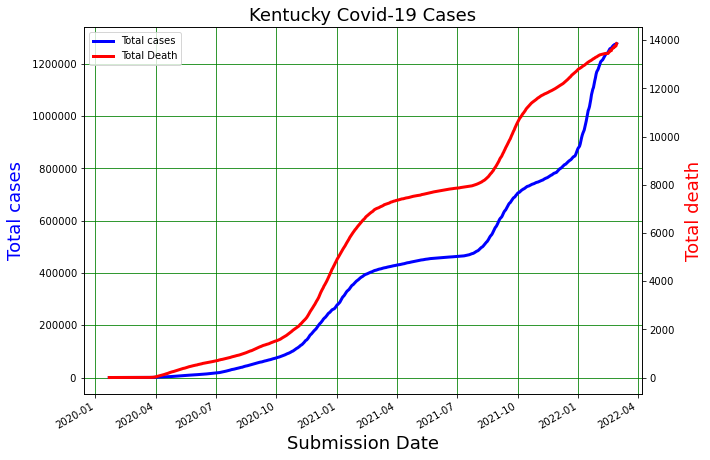

In [72]:
#Plottting Total cases and Total Death for Kentucky
fig, ax = plt.subplots(figsize=(10, 7.5))
ax2 = ax.twinx()
date_time = pd.to_datetime(df3['submission_date'])
l1, = ax.plot(date_time, df3['tot_cases'],color='blue', linewidth=3, linestyle='-',label='Total Cases')
l2, = ax2.plot(date_time, df3['tot_death'],color='red', linewidth=3, linestyle='-',label='Total death')
plt.gcf().autofmt_xdate()

ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))

ax.set_xlabel('Submission Date',fontsize=18)
ax.set_ylabel('Total cases',fontsize=18,color='blue')
ax2.set_ylabel('Total death',fontsize=18,color='red')
ax.set_title('Kentucky Covid-19 Cases',fontsize=18)

ax.grid(color='green')
ax.legend([l1, l2] ,['Total cases', 'Total Death'])
plt.show()

In [88]:
#px.line(df3, x= 'submission_date', y = ['tot_cases', 'tot_death'])

In [99]:
#Calculating number of recovery 
df3['recovery_rate'] = df3['tot_cases'] - df3['tot_death']
px.histogram(df3, x= 'submission_date', y = ['tot_death','tot_cases', 'recovery_rate'], 
             nbins=20, barmode='group',
             title ='KENTUCKY COVID-19 SUMMARY')

C:\Users\yetty\AppData\Local\Temp/ipykernel_10468/2546412160.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Calculating infection rate

In [127]:
df3['infection_rate'] = df3['tot_cases'].diff()
df3.tail()
px.histogram(df3, x= 'submission_date', y = 'infection_rate', nbins=120)

C:\Users\yetty\AppData\Local\Temp/ipykernel_10468/1088106580.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Calculating death rate

In [125]:
df3['death_rate'] = df3['tot_death'].diff()
df3.tail()
px.histogram(df3, x= 'submission_date', y = 'death_rate', nbins=120)

C:\Users\yetty\AppData\Local\Temp/ipykernel_10468/1581778541.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Calculating recovery rate

In [129]:
df3['recovery_rates'] = df3['recovery_rate'].diff()
df3.tail()
px.histogram(df3, x= 'submission_date', y = 'recovery_rates', nbins=120)

C:\Users\yetty\AppData\Local\Temp/ipykernel_10468/4173527435.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Showing maximum infection rate across the USA

In [111]:
USA_states = list(df['state'].unique())


In [139]:
USA_states = list(df['state'].unique())
max_infection_rates = []
for s in USA_states:
    MIR = df[df.state == s].tot_cases.diff().max()
    #print (MIR)
    max_infection_rates.append(MIR)
  #print(max_infection_rates)


In [135]:
df_MIR = pd.DataFrame()
df_MIR['state'] = USA_states
df_MIR['max_infection_rate'] = max_infection_rates
df_MIR.head()

,state,max_infection_rate
0,ND,235934.0
1,MD,1001509.0
2,CA,8867018.0
3,NE,452601.0
4,ME,222925.0


In [136]:
px.histogram(df_MIR, x = 'state', y = 'max_infection_rate', color = 'state', title = 'UNITED STATE MAXIMUM INFECTION RATE')